# Prediction of housing prices

Using the following models:

- Linear Regression
- Logistic Regression



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from ucimlrepo import fetch_ucirepo 
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
features_df = real_estate_valuation.data.features 
targets_df = real_estate_valuation.data.targets

df = pd.DataFrame(features_df, columns=features_df.columns)

## Understanding the data

The data consists of the following columns:
  - Targets: House prices of unit area
  - Features:
    - Transaction date
    - House age
    - Distance to the nearest MRT station
    - Number of convenience stores in the living circle
    - Latitude
    - Longitude

## Variables

In [10]:
print(real_estate_valuation.variables)

                                     name     role        type demographic  \
0                                      No       ID     Integer        None   
1                     X1 transaction date  Feature  Continuous        None   
2                            X2 house age  Feature  Continuous        None   
3  X3 distance to the nearest MRT station  Feature  Continuous        None   
4         X4 number of convenience stores  Feature     Integer        None   
5                             X5 latitude  Feature  Continuous        None   
6                            X6 longitude  Feature  Continuous        None   
7              Y house price of unit area   Target  Continuous        None   

                                         description  \
0                                               None   
1  for example, 2013.250=2013 March, 2013.500=201...   
2                                               None   
3                                               None   
4  number of conv

In [16]:
df.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


## Data preparation

### Cleaning

Handle missing values, if any.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values (if any)
df_cleaned = df.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Ensure data types are correct
df_cleaned = df_cleaned.astype({
    'X1 transaction date': 'float64',
    'X2 house age': 'float64',
    'X3 distance to the nearest MRT station': 'float64',
    'X4 number of convenience stores': 'int64',
    'X5 latitude': 'float64',
    'X6 longitude': 'float64'
})

Missing values in each column:
 X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64


### Feature selection and engineering

- Evaluate correlations between features and the target variable to select relevant features for modeling.
- Create a binary target variable for logistic regression, indicating whether the house price is above or below the average price.

In [18]:
# Evaluate correlations between features and the target variable
correlation_matrix = df_cleaned.corrwith(targets_df['Y house price of unit area'])

# Display the correlation values
print("Correlation between features and the target variable:\n", correlation_matrix)

Correlation between features and the target variable:
 X1 transaction date                       0.081626
X2 house age                             -0.185358
X3 distance to the nearest MRT station   -0.665869
X4 number of convenience stores           0.573428
X5 latitude                               0.541873
X6 longitude                              0.516966
dtype: float64


In [28]:
# Create a binary target variable for logistic regression
average_price = targets_df['Y house price of unit area'].mean()
targets_df.loc[:, 'Above_Average_Price'] = (targets_df['Y house price of unit area'] > average_price).astype(int)

# Display the updated targets dataframe
print(targets_df.head())

   Y house price of unit area  Above_Average_Price
0                        37.9                    1
1                        42.2                    1
2                        47.3                    1
3                        54.8                    1
4                        43.1                    1


This table shows us if the house price is above or below the average price. 1 means above average and 0 means below average.

### Scaling

Scale the features to ensure that all features contribute equally to the model.

In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(df_cleaned)

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_cleaned.columns)

# Display the first few rows of the scaled DataFrame
print(df_scaled.head())

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0            -0.816537      1.222879                               -0.798997   
1            -0.816537      0.117902                               -0.623231   
2             1.547740     -0.430167                               -0.420770   
3             1.253093     -0.430167                               -0.420770   
4            -1.114735     -1.163872                               -0.556661   

   X4 number of convenience stores  X5 latitude  X6 longitude  
0                         2.009994     1.115976      0.448029  
1                         1.669815     0.903155      0.400670  
2                         0.309097     1.477128      0.686121  
3                         0.309097     1.477128      0.686121  
4                         0.309097     0.824959      0.591404  


## Splitting the data

Split the data into training and testing sets. 80-20 split.

In [30]:
from sklearn.model_selection import train_test_split

# Ensure the targets_df has the same number of rows as df_cleaned
targets_df_cleaned = targets_df.loc[df_cleaned.index]

# Split the data for linear regression
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(df_scaled, targets_df_cleaned['Y house price of unit area'], test_size=0.2, random_state=42)

# Split the data for logistic regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(df_scaled, targets_df_cleaned['Above_Average_Price'], test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Linear Regression - X_train shape:", X_train_linear.shape)
print("Linear Regression - X_test shape:", X_test_linear.shape)
print("Linear Regression - y_train shape:", y_train_linear.shape)
print("Linear Regression - y_test shape:", y_test_linear.shape)

print("Logistic Regression - X_train shape:", X_train_logistic.shape)
print("Logistic Regression - X_test shape:", X_test_logistic.shape)
print("Logistic Regression - y_train shape:", y_train_logistic.shape)
print("Logistic Regression - y_test shape:", y_test_logistic.shape)

Linear Regression - X_train shape: (315, 6)
Linear Regression - X_test shape: (79, 6)
Linear Regression - y_train shape: (315,)
Linear Regression - y_test shape: (79,)
Logistic Regression - X_train shape: (315, 6)
Logistic Regression - X_test shape: (79, 6)
Logistic Regression - y_train shape: (315,)
Logistic Regression - y_test shape: (79,)


## Modeling 

We will model the data using both linear regression and logistic regression.

### Linear regression

Predict the continuous variable, Y house price of unit area

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
linear_regressor = LinearRegression()

# Fit the model on the training data
linear_regressor.fit(X_train_linear, y_train_linear)

# Predict on the test data
y_pred_linear = linear_regressor.predict(X_test_linear)

# Calculate and print the mean squared error and R^2 score
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
r2_linear = r2_score(y_test_linear, y_pred_linear)

print("Mean Squared Error (Linear Regression):", mse_linear)
print("R^2 Score (Linear Regression):", r2_linear)

Mean Squared Error (Linear Regression): 57.22830605093166
R^2 Score (Linear Regression): 0.6119930903235272


### Logistic regression

Classify whether the house price per unit area is above or below the average price.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logistic_regressor = LogisticRegression()

# Fit the model on the training data
logistic_regressor.fit(X_train_logistic, y_train_logistic)

# Predict on the test data
y_pred_logistic = logistic_regressor.predict(X_test_logistic)

# Calculate and print the accuracy
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

# Print the confusion matrix
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logistic)

# Print the classification report
class_report_logistic = classification_report(y_test_logistic, y_pred_logistic)
print("Classification Report (Logistic Regression):\n", class_report_logistic)

Accuracy (Logistic Regression): 0.8481012658227848
Confusion Matrix (Logistic Regression):
 [[28  9]
 [ 3 39]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        37
           1       0.81      0.93      0.87        42

    accuracy                           0.85        79
   macro avg       0.86      0.84      0.85        79
weighted avg       0.85      0.85      0.85        79



## Evaluation

### Linear regression

#### Metrics

In [39]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test_linear, y_pred_linear)
print("Mean Absolute Error (Linear Regression):", mae_linear)

# Mean Squared Error (MSE) and R-squared (already calculated)
print("Mean Squared Error (Linear Regression):", mse_linear)
print("R^2 Score (Linear Regression):", r2_linear)

# Calculate Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mse_linear)
print("Root Mean Squared Error (Linear Regression):", rmse_linear)

Mean Absolute Error (Linear Regression): 6.036611541580258
Mean Squared Error (Linear Regression): 57.22830605093166
R^2 Score (Linear Regression): 0.6119930903235272
Root Mean Squared Error (Linear Regression): 7.564939262871293


#### Visualizations

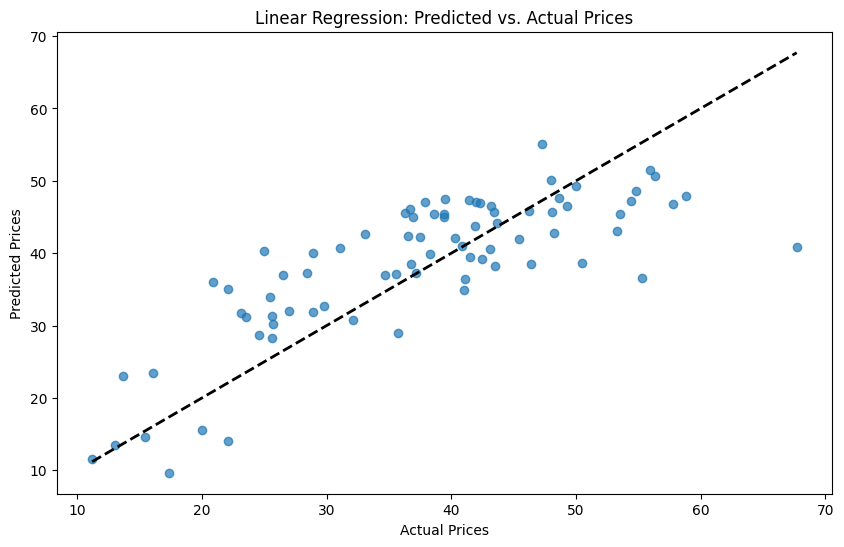

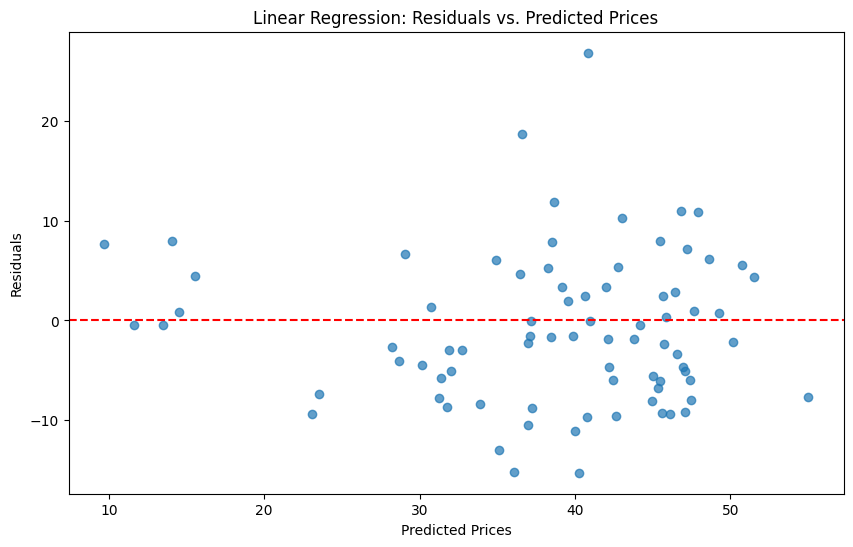

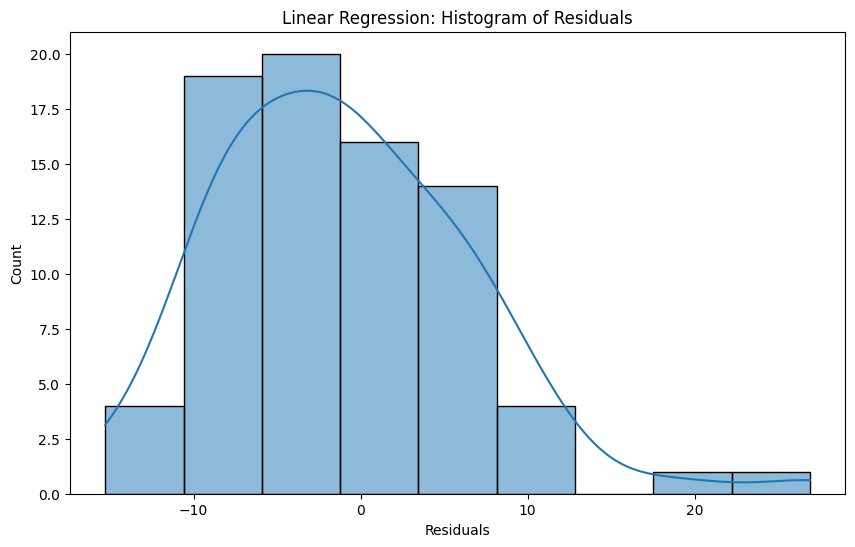

In [40]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear, y_pred_linear, alpha=0.7)
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Predicted vs. Actual Prices')
plt.show()

# Analyze residuals to assess model fit
residuals = y_test_linear - y_pred_linear

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs. Predicted Prices')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Linear Regression: Histogram of Residuals')
plt.show()

### Logistic regression

#### Metrics

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate and print the accuracy
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

# Print the classification report
class_report_logistic = classification_report(y_test_logistic, y_pred_logistic)
print("Classification Report (Logistic Regression):\n", class_report_logistic)

# Calculate ROC-AUC score
roc_auc_logistic = roc_auc_score(y_test_logistic, logistic_regressor.predict_proba(X_test_logistic)[:, 1])
print("ROC-AUC Score (Logistic Regression):", roc_auc_logistic)

Accuracy (Logistic Regression): 0.8481012658227848
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        37
           1       0.81      0.93      0.87        42

    accuracy                           0.85        79
   macro avg       0.86      0.84      0.85        79
weighted avg       0.85      0.85      0.85        79

ROC-AUC Score (Logistic Regression): 0.9163449163449164


#### Visualizations

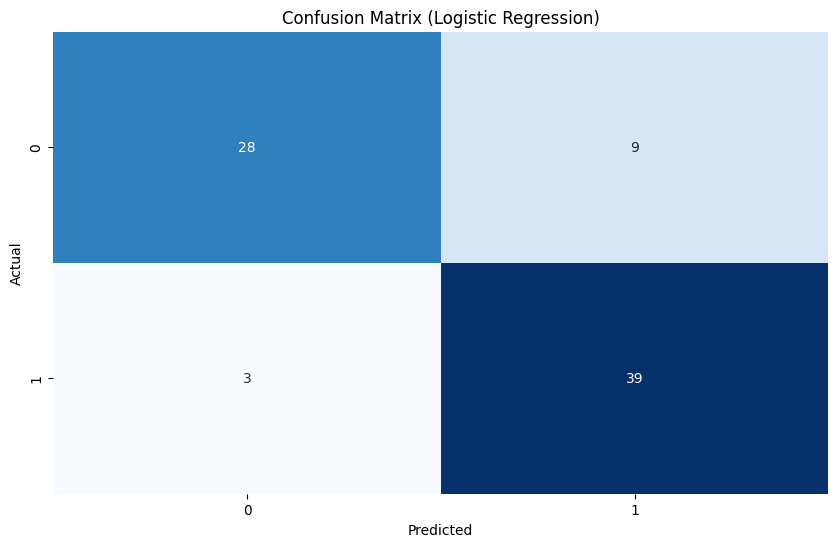

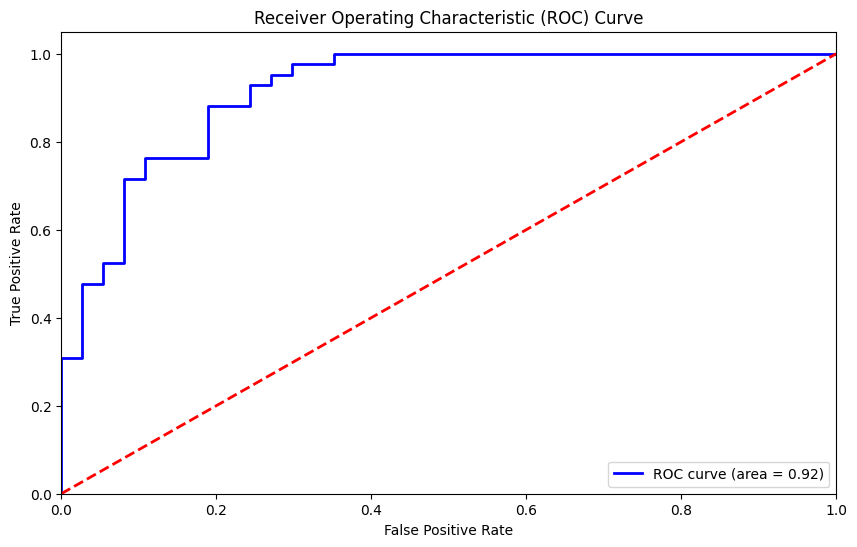

In [43]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_logistic, logistic_regressor.predict_proba(X_test_logistic)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Conclusions

### Most important features: 

The distance to the nearest MRT station is the most crucial factor for predicting house prices, followed by the number of convenience stores and the geographical location (latitude and longitude).

### Less important features: 

House age and transaction date are less important in determining house prices, with transaction date being the least significant factor.

### Standardization of data

Standardizing of the data is not strictly necessary for linear regression, but it is essential for logistic regression to ensure that all features contribute equally to the model.

Thus in this notebook, we will standardize the data before modeling it using logistic regression.